# Knowledge Graph Triplet

Generate MS text -> EN Knowledge Graph Triplet.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/knowledge-graph-triplet](https://github.com/huseinzol05/Malaya/tree/master/example/knowledge-graph-triplet).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time

import malaya

CPU times: user 4.81 s, sys: 840 ms, total: 5.65 s
Wall time: 5.7 s


### List available Transformer model

In [2]:
malaya.knowledge_graph.available_transformer()

INFO:root:tested on 200k test set.


,Size (MB),Quantized Size (MB),BLEU,Suggested length
base,246.0,63.8,0.8572,256.0
large,632.0,161.0,0.8595,256.0


### Load Transformer model

```python
def transformer(model: str = 'base', quantized: bool = False, **kwargs):
    """
    Load transformer to generate knowledge graphs in triplet format from texts,
    MS text -> EN triplet format.

    Parameters
    ----------
    model : str, optional (default='base')
        Model architecture supported. Allowed values:

        * ``'base'`` - Transformer BASE parameters.
        * ``'large'`` - Transformer LARGE parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: malaya.model.tf.KnowledgeGraph class
    """
```

In [3]:
model = malaya.knowledge_graph.transformer()

INFO:root:running knowledge-graph-generator/base using device /device:CPU:0


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [4]:
quantized_model = malaya.knowledge_graph.transformer(quantized = True)

INFO:root:running knowledge-graph-generator/base-quantized using device /device:CPU:0


In [5]:
string1 = "Yang Berhormat Dato Sri Haji Mohammad Najib bin Tun Haji Abdul Razak ialah ahli politik Malaysia dan merupakan bekas Perdana Menteri Malaysia ke-6 yang mana beliau menjawat jawatan dari 3 April 2009 hingga 9 Mei 2018. Beliau juga pernah berkhidmat sebagai bekas Menteri Kewangan dan merupakan Ahli Parlimen Pekan Pahang"
string2 = "Pahang ialah negeri yang ketiga terbesar di Malaysia Terletak di lembangan Sungai Pahang yang amat luas negeri Pahang bersempadan dengan Kelantan di utara Perak Selangor serta Negeri Sembilan di barat Johor di selatan dan Terengganu dan Laut China Selatan di timur."

These models heavily trained on neutral texts, if you give political or news texts, the results returned not really good.

#### Predict using greedy decoder

```python
def greedy_decoder(self, strings: List[str], get_networkx: bool = True):
    """
    Generate triples knowledge graph using greedy decoder.
    Example, "Joseph Enanga juga bermain untuk Union Douala." -> "Joseph Enanga member of sports team Union Douala"

    Parameters
    ----------
    strings : List[str]
    get_networkx: bool, optional (default=True)
        If True, will generate networkx.MultiDiGraph.

    Returns
    -------
    result: List[Dict]
    """
```

In [6]:
r = model.greedy_decoder([string1, string2])

In [7]:
r[0]

{'result': [{'subject': 'Honored Dato Sri Haji Mohammad Najib bin Tun Haji Abdul Razak',
   'relation': 'occupation',
   'object': 'Politician'},
  {'subject': '6th Prime Minister of Malaysia',
   'relation': 'position held',
   'object': 'Member of the Pekan Pahang Parliament'},
  {'subject': '6th Prime Minister of Malaysia',
   'relation': 'end time',
   'object': '09 May 2018'},
  {'subject': 'Prime Minister of Malaysia',
   'relation': 'position held',
   'object': 'Minister of Finance'},
  {'subject': 'Member of the Pekan Pahang Parliament',
   'relation': 'start time',
   'object': '03 April 2009'}],
 'main_object': 'Honored Dato Sri Haji Mohammad Najib bin Tun Haji Abdul Razak',
 'triple': 'Honored Dato Sri Haji Mohammad Najib bin Tun Haji Abdul Razak occupation Politician, 6th Prime Minister of Malaysia position held Member of the Pekan Pahang Parliament, 6th Prime Minister of Malaysia end time 09 May 2018, Prime Minister of Malaysia position held Minister of Finance, Member of

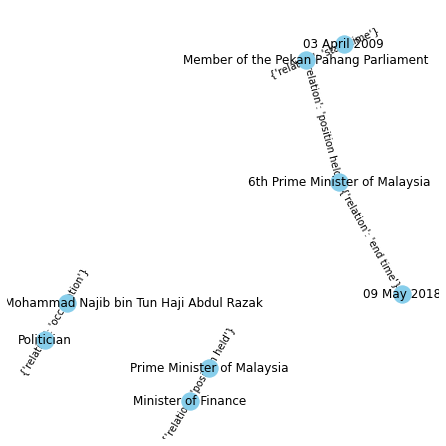

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

g = r[0]['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

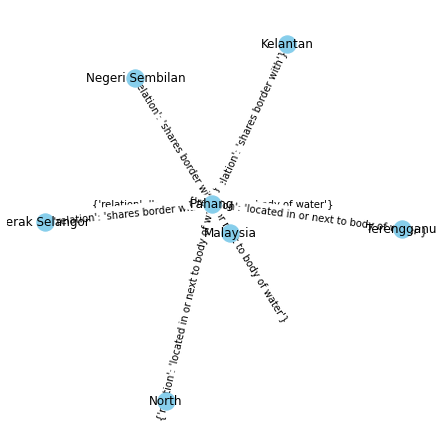

In [9]:
g = r[1]['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

#### Predict using beam decoder

```python
def beam_decoder(self, strings: List[str], get_networkx: bool = True):
    """
    Generate triples knowledge graph using beam decoder.
    Example, "Joseph Enanga juga bermain untuk Union Douala." -> "Joseph Enanga member of sports team Union Douala"

    Parameters
    ----------
    strings : List[str]
    get_networkx: bool, optional (default=True)
        If True, will generate networkx.MultiDiGraph.

    Returns
    -------
    result: List[Dict]
    """
```

In [10]:
r = model.beam_decoder([string1, string2])

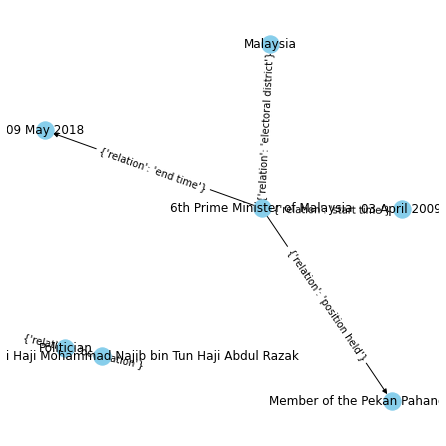

In [13]:
g = r[0]['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

In [68]:
# https://ms.wikipedia.org/wiki/Malaysia

string = """
Malaysia secara rasminya Persekutuan Malaysia ialah sebuah negara raja berperlembagaan persekutuan di Asia Tenggara yang terdiri daripada tiga belas negeri dan tiga wilayah persekutuan, yang menduduki bumi berkeluasan 330,803 kilometer persegi (127,720 bt2). Malaysia terbahagi kepada dua kawasan yang mengapit Laut China Selatan, iaitu Semenanjung Malaysia dan Borneo Malaysia (juga Malaysia Barat dan Timur). Malaysia berkongsi sempadan darat dengan Thailand, Indonesia, dan Brunei dan juga sempadan laut dengan Singapura dan Filipina. Ibu negara Malaysia ialah Kuala Lumpur, manakala Putrajaya merupakan pusat kerajaan persekutuan. Pada tahun 2009, Malaysia diduduki oleh 28 juta penduduk dan pada tahun 2017 dianggarkan telah mencecah lebih 30 juta orang yang menduduki di Malaysia.

Malaysia berakar-umbikan Kerajaan-kerajaan Melayu yang wujud di wilayahnya dan menjadi taklukan Empayar British sejak abad ke-18. Wilayah British pertama di sini dikenali sebagai Negeri-Negeri Selat. Semenanjung Malaysia yang ketika itu dikenali sebagai Tanah Melayu atau Malaya, mula-mula disatukan di bawah komanwel pada tahun 1946, sebelum menjadi Persekutuan Tanah Melayu pada tahun 1948. Pada tahun 1957 Semenanjung Malaysia mencapai Kemerdekaan dan bebas daripada penjajah dan sekali gus menjadi catatan sejarah terpenting bagi Malaysia. Pada tahun 1963, Tanah Melayu bersatu bersama dengan negara Sabah, Sarawak, dan Singapura bagi membentuk Malaysia. Pada tahun 1965, Singapura keluar dari persekutuan untuk menjadi negara kota yang bebas. Semenjak itu, Malaysia menikmati antara ekonomi yang terbaik di Asia, dengan purata pertumbuhan keluaran dalam negara kasarnya (KDNK) kira-kira 6.5% selama 50 tahun pertama kemerdekaannya. 

Ekonomi negara yang selama ini dijana oleh sumber alamnya kini juga berkembang dalam sektor-sektor ukur tanah, sains, kejuruteraan, pendidikan, pelancongan, perkapalan, perdagangan dan perubatan.

Ketua negara Malaysia ialah Yang di-Pertuan Agong, iaitu raja elektif yang terpilih dan diundi dari kalangan sembilan raja negeri Melayu. Ketua kerajaannya pula ialah Perdana Menteri. Sistem kerajaan Malaysia banyak berdasarkan sistem parlimen Westminster, dan sistem perundangannya juga berasaskan undang-undang am Inggeris.

Malaysia terletak berdekatan dengan khatulistiwa dan beriklim tropika, serta mempunyai kepelbagaian flora dan fauna, sehingga diiktiraf menjadi salah satu daripada 17 negara megadiversiti. Di Malaysia terletaknya Tanjung Piai, titik paling selatan di seluruh tanah besar Eurasia. Malaysia ialah sebuah negara perintis Persatuan Negara-Negara Asia Tenggara dan Pertubuhan Persidangan Islam, dan juga anggota Kerjasama Ekonomi Asia-Pasifik, Negara-Negara Komanwel, dan Pergerakan Negara-Negara Berkecuali.
"""

In [69]:
def simple_cleaning(string):
    return ''.join([s for s in string if s not in ',.\'";'])

string = malaya.text.function.split_into_sentences(string)
string = [simple_cleaning(s) for s in string if len(s) > 50]
string

['Malaysia secara rasminya Persekutuan Malaysia ialah sebuah negara raja berperlembagaan persekutuan di Asia Tenggara yang terdiri daripada tiga belas negeri dan tiga wilayah persekutuan yang menduduki bumi berkeluasan 330803 kilometer persegi (127720 bt2)',
 'Malaysia terbahagi kepada dua kawasan yang mengapit Laut China Selatan iaitu Semenanjung Malaysia dan Borneo Malaysia (juga Malaysia Barat dan Timur)',
 'Malaysia berkongsi sempadan darat dengan Thailand Indonesia dan Brunei dan juga sempadan laut dengan Singapura dan Filipina',
 'Ibu negara Malaysia ialah Kuala Lumpur manakala Putrajaya merupakan pusat kerajaan persekutuan Pada tahun 2009 Malaysia diduduki oleh 28 juta penduduk dan pada tahun 2017 dianggarkan telah mencecah lebih 30 juta orang yang menduduki di Malaysia',
 'Malaysia berakar-umbikan Kerajaan-kerajaan Melayu yang wujud di wilayahnya dan menjadi taklukan Empayar British sejak abad ke-18',
 'Wilayah British pertama di sini dikenali sebagai Negeri-Negeri Selat',
 'Se

In [70]:
r = model.greedy_decoder(string)

In [71]:
g = r[0]['G']

for i in range(1, len(r), 1):
    g.update(r[i]['G'])

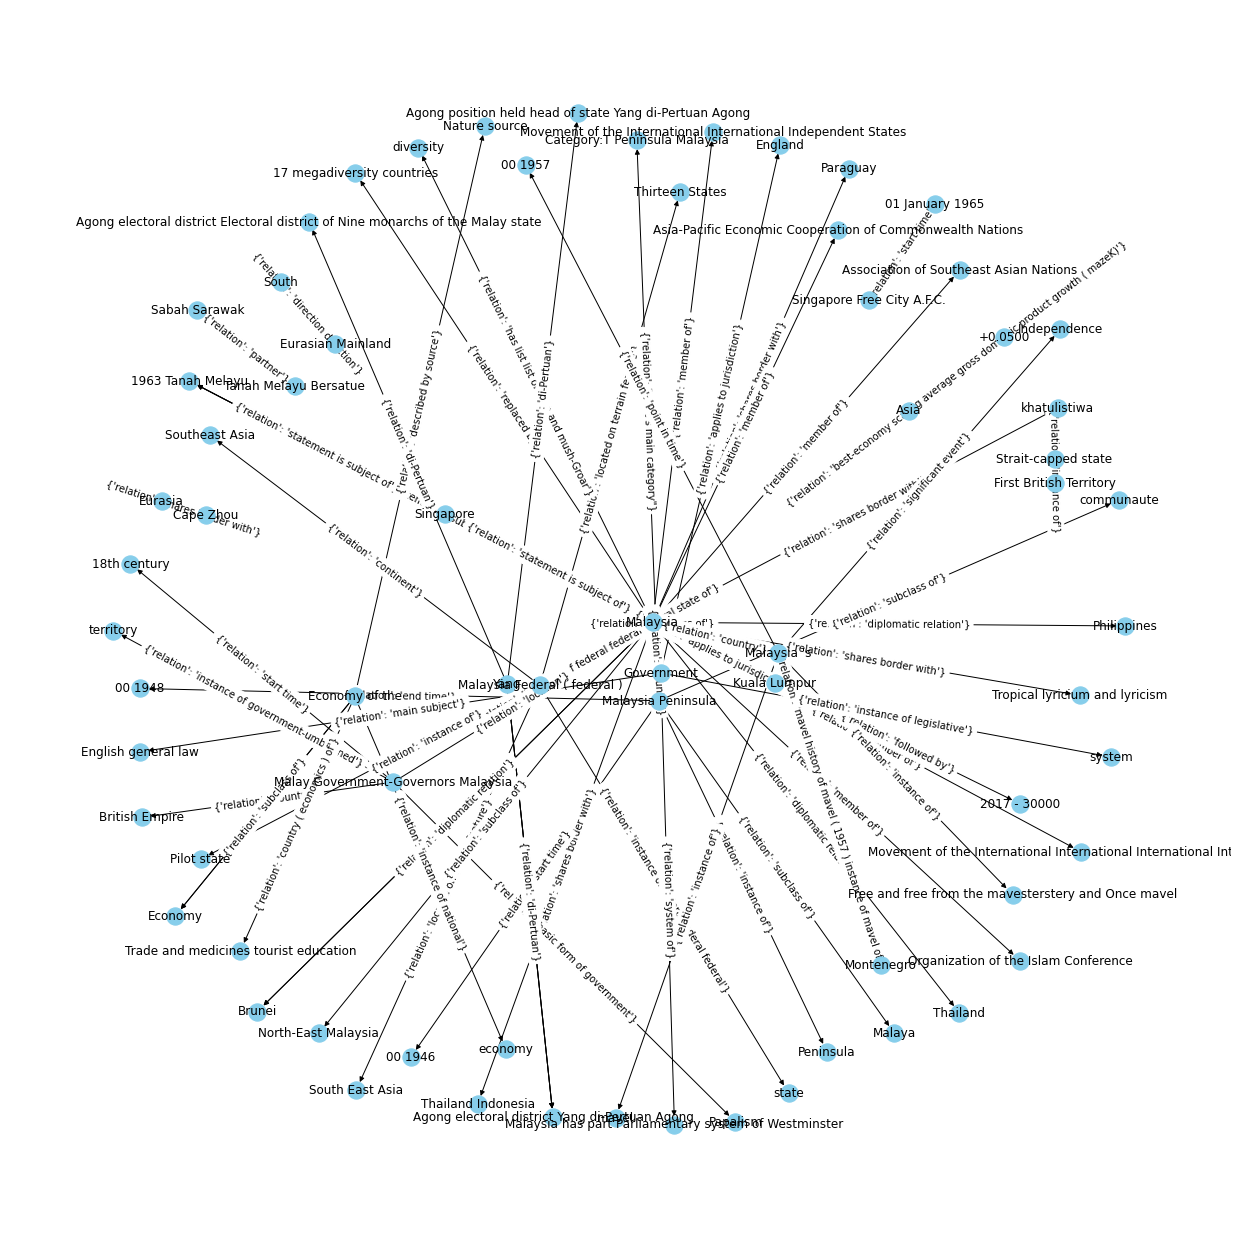

In [72]:
plt.figure(figsize=(17, 17))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()